# Hyperparameter Tuning with Python

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [3]:
import pandas as pd
import numpy as np

# Persiapan Datasets
* Telco Churn (assignment)

In [4]:
# load datasets /content/drive/MyDrive/Dibimbing/data/
df = pd.read_csv('churnday32.csv')

In [5]:
# show first 5 columns of data
# data dictionary can be found at
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


### Handle Missing Values

In [7]:
# Periksa nilai yang hilang
df.isnull().sum()


,0
customerID,9
Gender,16
SeniorCitizen,12
Partner,16
Dependents,19
Tenure,17
Contract,13
PaperlessBilling,13
PaymentMethod,11
MonthlyCharges,10


In [8]:
# Tangani nilai yang hilang
def handle_missing_values(df):
    """
    Handle missing values in different data types
    """
    # Make a copy of the dataframe
    df_clean = df.copy()

    # Get numeric and categorical columns
    numeric_columns = df_clean.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df_clean.select_dtypes(include=['object']).columns

    # Print initial info about missing values
    print("Initial missing values:")
    print(df_clean.isnull().sum())
    print("\n")

    # 1. Handle numeric columns
    for col in numeric_columns:
        # Replace with median for numeric columns
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"Filled numeric column '{col}' with median value: {median_value}")

    # 2. Handle categorical columns
    for col in categorical_columns:
        # Replace with mode (most frequent value) for categorical columns
        mode_value = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"Filled categorical column '{col}' with mode value: {mode_value}")

    # Print final info about missing values
    print("\nRemaining missing values:")
    print(df_clean.isnull().sum())

    return df_clean

In [9]:
df_clean = handle_missing_values(df)

Initial missing values:
customerID           9
Gender              16
SeniorCitizen       12
Partner             16
Dependents          19
Tenure              17
Contract            13
PaperlessBilling    13
PaymentMethod       11
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64


Filled numeric column 'SeniorCitizen' with median value: 0.0
Filled numeric column 'Tenure' with median value: 29.0
Filled numeric column 'MonthlyCharges' with median value: 70.35
Filled numeric column 'TotalCharges' with median value: 1397.1
Filled categorical column 'customerID' with mode value: 2236-HILPA
Filled categorical column 'Gender' with mode value: Male
Filled categorical column 'Partner' with mode value: No
Filled categorical column 'Dependents' with mode value: No
Filled categorical column 'Contract' with mode value: Month-to-month
Filled categorical column 'PaperlessBilling' with mode value: Yes
Filled categorical column 'PaymentMethod' with mode value: Electroni

<ipython-input-8-7dbdf8ca9e00>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_value, inplace=True)
<ipython-input-8-7dbdf8ca9e00>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Handle Duplicate Value

In [10]:
# Hapus duplikat
df_clean.drop_duplicates()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,No,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0.0,Yes,Yes,24.0,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0.0,Yes,Yes,72.0,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0.0,Yes,Yes,11.0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1.0,Yes,No,4.0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


It seems that `num_reactions` is the sum of of various reactions on its right hand side columns. This is a **redundant feature**.

# Split Target Variabel

In [11]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns='Churn')
y = df_clean[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Studi Multikorneality

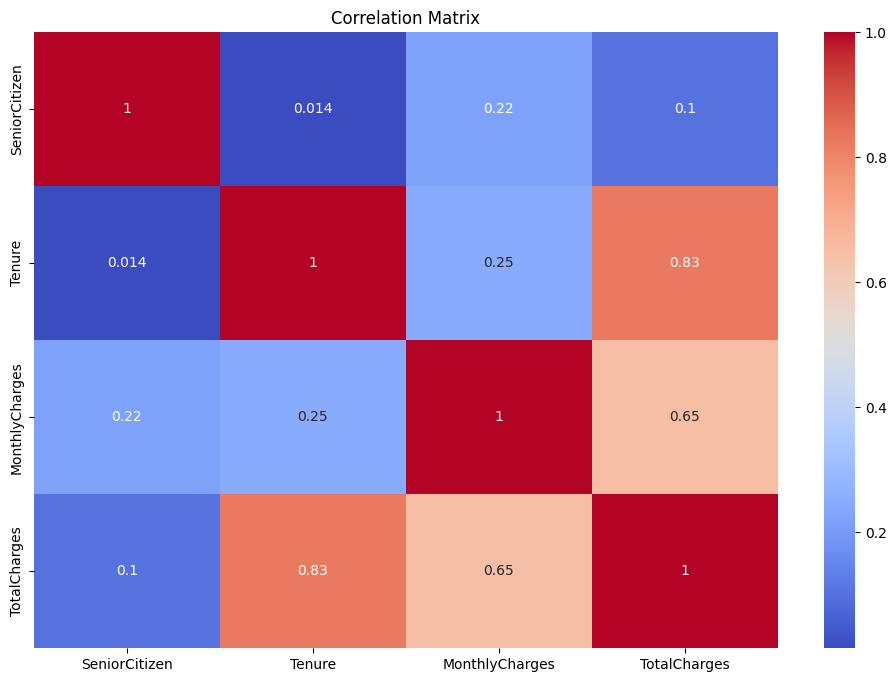


Fitur dengan korelasi tinggi (>0.7):
Tenure - TotalCharges: 0.83


[('Tenure', 'TotalCharges')]

In [13]:
# Hitung matriks korelasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude non-numeric columns from correlation calculation
numeric_X = X.select_dtypes(include=['number'])  # Select only numeric columns

# Hitung matriks korelasi
correlation_matrix = numeric_X.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identifikasi fitur yang berkorelasi tinggi
threshold = 0.7 # You can change the threshold for high correlation
high_corr_features = np.where(np.abs(correlation_matrix) > threshold)
high_corr_features = [(correlation_matrix.index[x], correlation_matrix.columns[y])
                      for x, y in zip(*high_corr_features) if x != y and x < y]

print("\nFitur dengan korelasi tinggi (>{}):".format(threshold))
for feat1, feat2 in high_corr_features:
    print(f"{feat1} - {feat2}: {correlation_matrix.loc[feat1, feat2]:.2f}")

high_corr_features

# Pengolahan Data Kategorikal

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_columns = X.select_dtypes(include=['object']).columns
# Label Encoding untuk kolom binary
le = LabelEncoder()
for col in categorical_columns:
    if X[col].nunique() == 2:
        X[col] = le.fit_transform(X[col])
    else:
        # One Hot Encoding untuk kolom non-binary
        X = pd.get_dummies(X, columns=[col], prefix=[col])

X.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,...,customerID_9992-UJOEL,customerID_9993-LHIEB,customerID_9995-HOTOH,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.0,0,0,1.0,1,29.85,29.85,False,False,...,False,False,False,True,False,False,False,False,True,False
1,1,0.0,0,0,34.0,0,56.95,1889.50,False,False,...,False,False,False,False,True,False,False,False,False,True
2,1,0.0,0,0,2.0,1,53.85,108.15,False,False,...,False,False,False,True,False,False,False,False,False,True
3,1,0.0,0,0,45.0,0,42.30,1840.75,False,False,...,False,False,False,False,True,False,True,False,False,False
4,0,0.0,0,0,2.0,1,70.70,151.65,False,False,...,False,False,False,True,False,False,False,False,True,False


In [16]:
# Standardisasi fitur numerik
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split Data Train Test

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Pemilihan Metrik

In [22]:
from sklearn.ensemble import RandomForestClassifier
# Definisikan parameter grid untuk RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Pelatihan Model

In [23]:
from sklearn.model_selection import GridSearchCV
# Lakukan GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nParameter terbaik:", grid_search.best_params_)



best_model = grid_search.best_estimator_



Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [24]:
# the complete results
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.490189,0.839223,0.159512,0.063616,10,1,2,100,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.733207,0.733207,0.733207,0.733207,0.733902,0.733346,0.000278,9
1,4.812327,0.634571,0.156721,0.048918,10,1,2,200,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.733207,0.733207,0.733207,0.733207,0.733902,0.733346,0.000278,9
2,2.149153,0.202859,0.110922,0.010287,10,1,5,100,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.733207,0.733207,0.733207,0.733207,0.733902,0.733346,0.000278,9
3,4.939321,0.531764,0.142233,0.030847,10,1,5,200,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.733207,0.733207,0.733207,0.733207,0.733902,0.733346,0.000278,9
4,1.042879,0.324821,0.091689,0.011884,10,2,2,100,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.733207,0.733207,0.733207,0.733207,0.733902,0.733346,0.000278,9
5,1.408344,0.293302,0.129066,0.037686,10,2,2,200,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.733207,0.733207,0.733207,0.733207,0.733902,0.733346,0.000278,9
6,1.459397,0.143761,0.190518,0.012304,10,2,5,100,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.733207,0.733207,0.733207,0.733207,0.733902,0.733346,0.000278,9
7,1.442640,0.117764,0.110852,0.012929,10,2,5,200,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.733207,0.733207,0.733207,0.733207,0.733902,0.733346,0.000278,9
8,5.017401,0.696151,0.148162,0.030815,20,1,2,100,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.736991,0.736991,0.734153,0.740776,0.737689,0.737320,0.002113,6
9,8.021785,0.737028,0.164013,0.018679,20,1,2,200,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.735099,0.741722,0.737938,0.740776,0.733902,0.737887,0.003056,5


In [25]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.733346,9
1,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.733346,9
2,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.733346,9
3,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.733346,9
4,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.733346,9
5,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.733346,9
6,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.733346,9
7,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",0.733346,9
8,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.737320,6
9,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.737887,5


# Evaluasi Model

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1299
         Yes       0.68      0.44      0.54       463

    accuracy                           0.80      1762
   macro avg       0.75      0.69      0.71      1762
weighted avg       0.79      0.80      0.78      1762



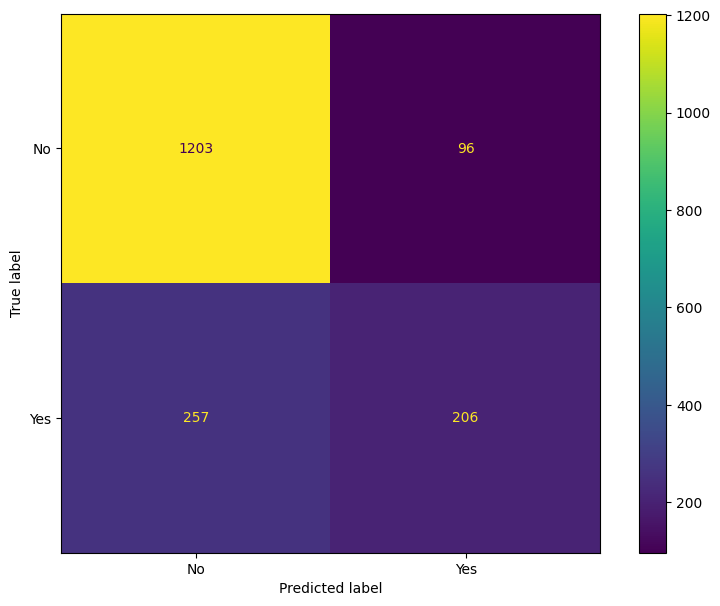

In [27]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = best_model.predict(X_test)

print("Best parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

Accuracy shown good result at 80% by using Random Forest Model. However, it shows low Recall at 44% where the actual Churn (257 data) is predicted as No Churn, which can lead to nonoptimal handling of potential Churn customers.